# Move a shape to the center of the scene

Say you have a shape inside a picture, and you want to move it somewhere else inside the same picture.


In [1]:
(ns unwavering-briars
 (:require
  [opencv4.utils :as u]
  [opencv4.colors.html :refer :all]
  [opencv4.core :refer :all]))

nil

The plan is defined as follow:

- load the picture, and add a quick border to get it to show properly here.
- go into HSV color space to be able to select only the object we want use a color range
- create a mask 

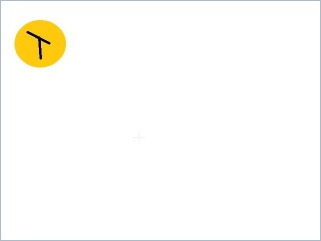

In [2]:
(def img 
  (-> "resources/morph/cjy6M.jpg" 
      (imread IMREAD_REDUCED_COLOR_2)
      (copy-make-border! 1 1 1 1 
		BORDER_CONSTANT 
        (->scalar "#aabbcc"))))

(u/>>> img)

## thresh hold on yellow in hsv spacez

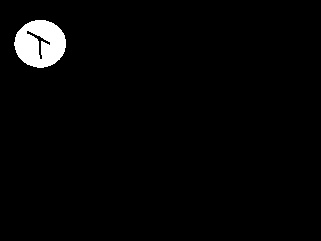

In [3]:
(def mask-on-yellow
  (-> 
    img 
    clone 
    (cvt-color! COLOR_BGR2HSV) 
    (in-range! (new-scalar 20 100 100) (new-scalar 30 255 255))))

(u/>>> mask-on-yellow)

In [4]:
(-> (u/matrix-to-mat [[100 255 200]
                      [100 255 200]
                      [100 255 200]])
	(threshold! 150 255 THRESH_BINARY)
    (dump))

[0 255 255]
[0 255 255]
[0 255 255]


nil

## find contours, and select first 1, (actually only one)

In [5]:
(def contours (new-arraylist))
(find-contours mask-on-yellow contours (new-mat) RETR_EXTERNAL CHAIN_APPROX_SIMPLE)
(count contours)

1

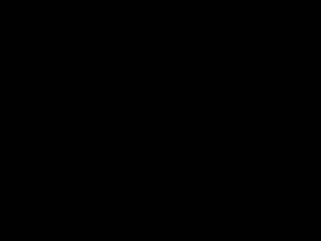

In [6]:
(def background-color  (->scalar "#000000"))
; mask type CV_8UC1 is important !!
(def mask (new-mat (rows img) (cols img) CV_8UC1 background-color))

(u/>>> mask)

Here we draw the one contour we have found, using the *FILLED* setting of draw-contours. 

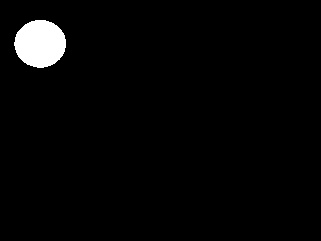

In [7]:
(draw-contours mask contours 0 (new-scalar 255.0) FILLED)
(u/>>> mask)

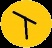

In [8]:
(def box 
  (bounding-rect (first contours)))
(def item 
  (submat img box))

(u/>>> item)

(def segmented-item
  (new-mat (rows item) (cols item) CV_8UC3 background-color))
(copy-to item segmented-item (submat mask box) )

(u/>>> segmented-item)

In [9]:
(def center
  (new-point (/ (.cols img ) 2 ) (/ (.rows img) 2)))

(def center-box
  (new-rect
    (- (.-x center ) (/ (.-width box) 2))
    (- (.-y center ) (/ (.-height box) 2))
    (.-width box)
    (.-height box)))

#'unwavering-briars/center-box

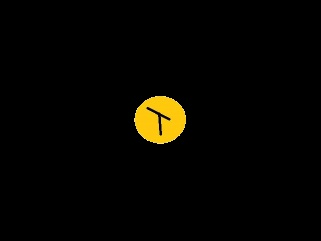

In [10]:

  (def result (new-mat (rows img) (cols img) CV_8UC3 background-color))

  (def final (submat result center-box))
  (copy-to segmented-item final (new-mat))

(u/>>> result)